In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [125]:
# Constants
POPULARITY_THRESHOLD = 50
SEED = 42

# I. Load data

In [126]:
# Download latest version
data_path = kagglehub.dataset_download("amitanshjoshi/spotify-1million-tracks")

print("Path to dataset files:", data_path)

Path to dataset files: /Users/mahabub.ahmed.eee/.cache/kagglehub/datasets/amitanshjoshi/spotify-1million-tracks/versions/1


In [127]:
# I. Load data
data = pd.read_csv(f"{data_path}/spotify_data.csv")
data.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [129]:
data.isnull().sum()

Unnamed: 0           0
artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

In [130]:
data['genre'].value_counts()

genre
black-metal       21852
gospel            21621
ambient           21389
acoustic          21097
alt-rock          20918
                  ...  
chicago-house      5170
dubstep            4774
detroit-techno     3920
rock               3319
songwriter          589
Name: count, Length: 82, dtype: int64

In [131]:
data = data[data['popularity'] > 0]

## Verdict

In [132]:
data['verdict'] = (data['popularity'] > POPULARITY_THRESHOLD).astype(int)
data['verdict'].value_counts()

verdict
0    953675
1     47698
Name: count, dtype: int64

In [133]:
# verdict 1 percentage
verdict_1_percentage = (data['verdict'].sum() / data.shape[0]) * 100
print(f"Percentage of tracks with popularity > {POPULARITY_THRESHOLD}: {verdict_1_percentage:.2f}%")

Percentage of tracks with popularity > 50: 4.76%


# Ibis. Heat Map

In [134]:
# drop the first 4 columns
data_4_heat_map = data.iloc[:, 4:]
data_4_heat_map.drop(['genre', 'mode', 'verdict'], axis=1, inplace=True)
data_4_heat_map.head()

,popularity,year,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,68,2012,0.483,0.303,4,-10.058,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,50,2012,0.572,0.454,3,-10.286,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,57,2012,0.409,0.234,3,-13.711,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,58,2012,0.392,0.251,10,-9.845,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,54,2012,0.430,0.791,6,-5.419,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


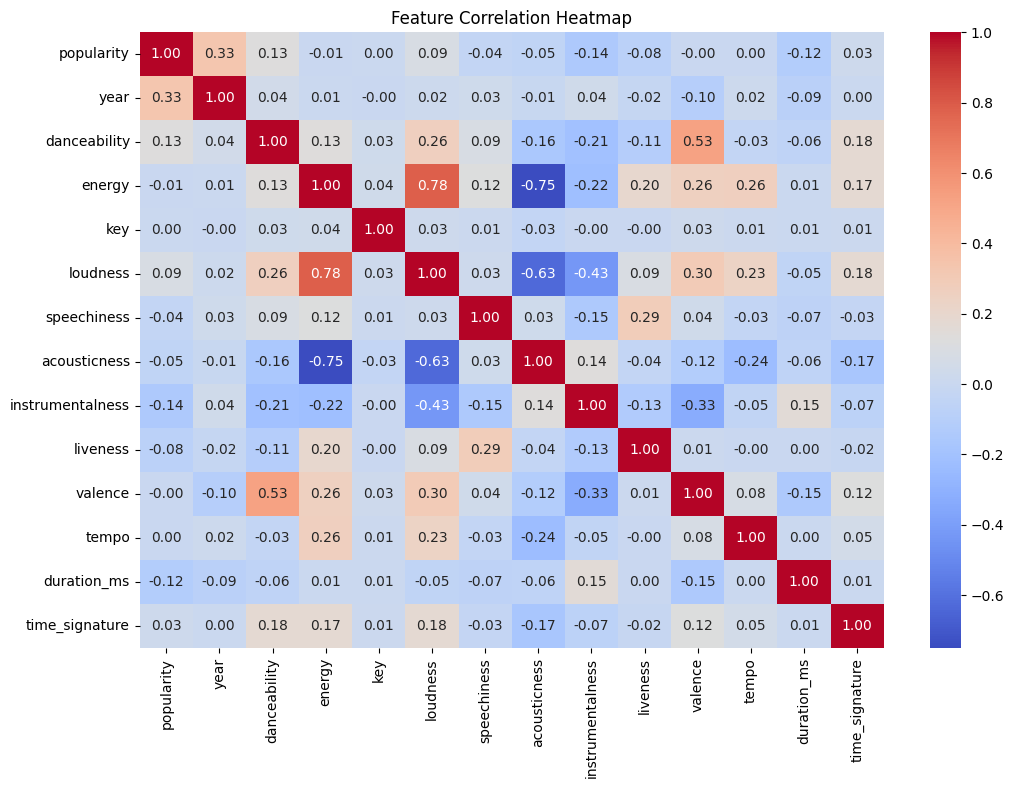

In [135]:
# plot heatmap of correlations
plt.figure(figsize=(12, 8))
correlation_matrix = data_4_heat_map.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# II. Visualization

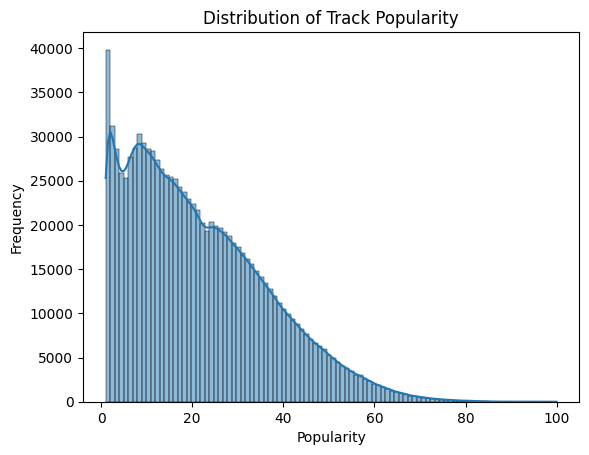

In [136]:
# plot popularity distribution
sns.histplot(data['popularity'], bins=100, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

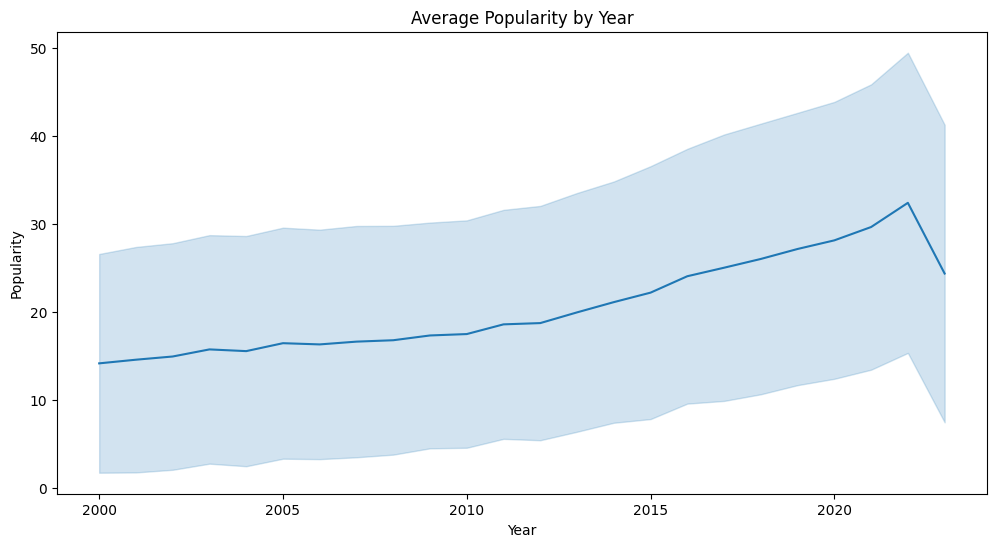

In [137]:
# plot years avg popularity using a line plot including intervals
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='popularity', data=data, errorbar='sd')
plt.title('Average Popularity by Year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

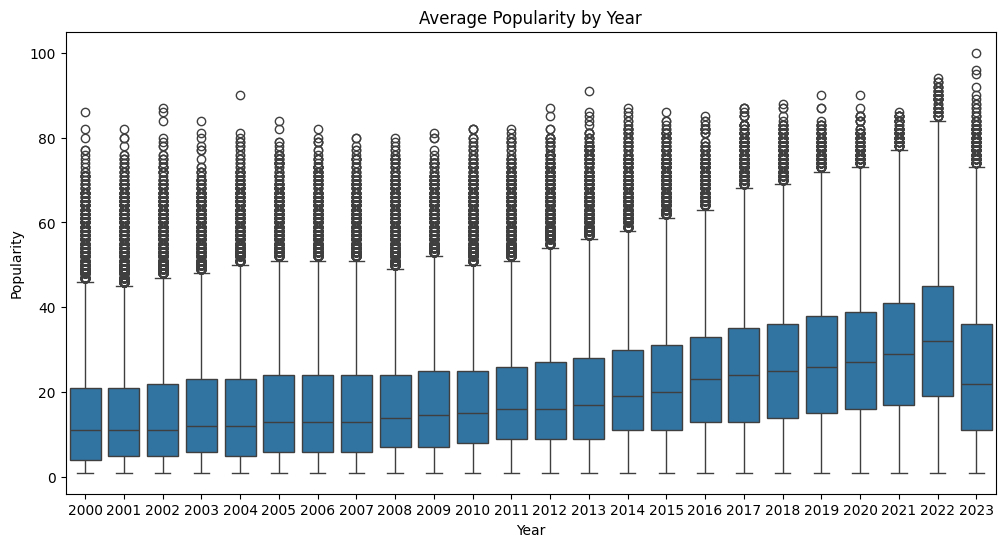

In [138]:
# plot years avg popularity using a line plot including intervals
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='popularity', data=data)
plt.title('Average Popularity by Year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

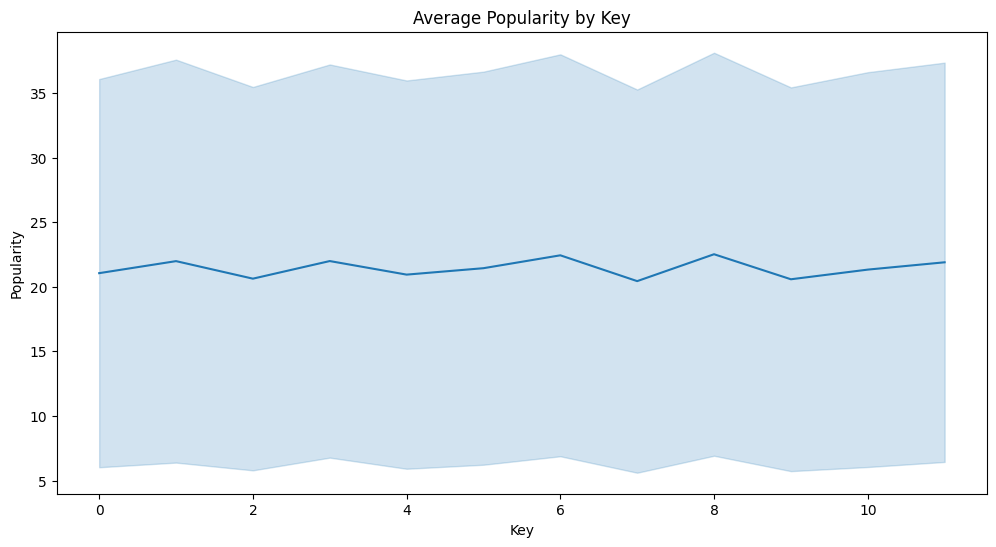

In [139]:
# key vs popularity line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='key', y='popularity', data=data, errorbar='sd')
plt.title('Average Popularity by Key')
plt.xlabel('Key')
plt.ylabel('Popularity')
plt.show()

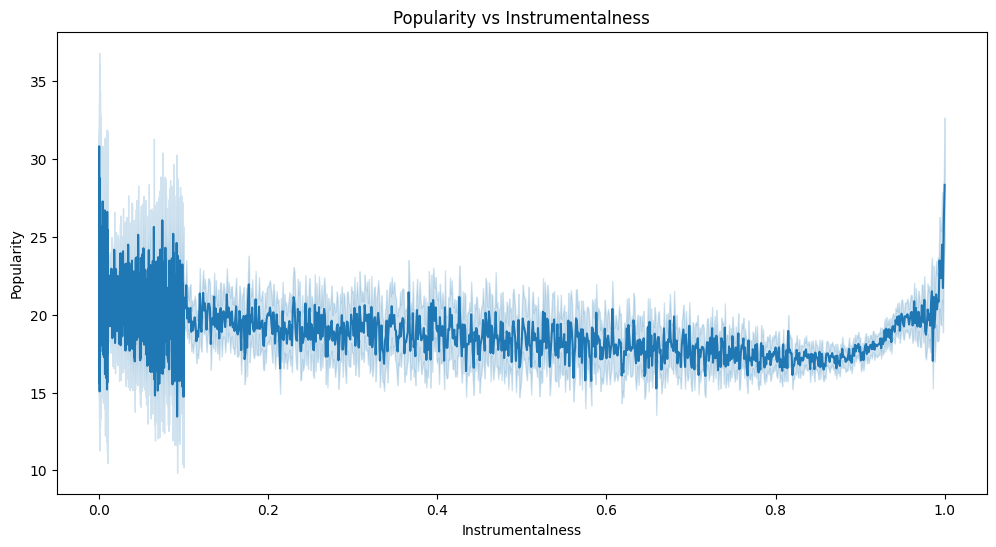

In [140]:
# popularity vs instrumentalness line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='instrumentalness', y='popularity', data=data)
plt.title('Popularity vs Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')
plt.show()

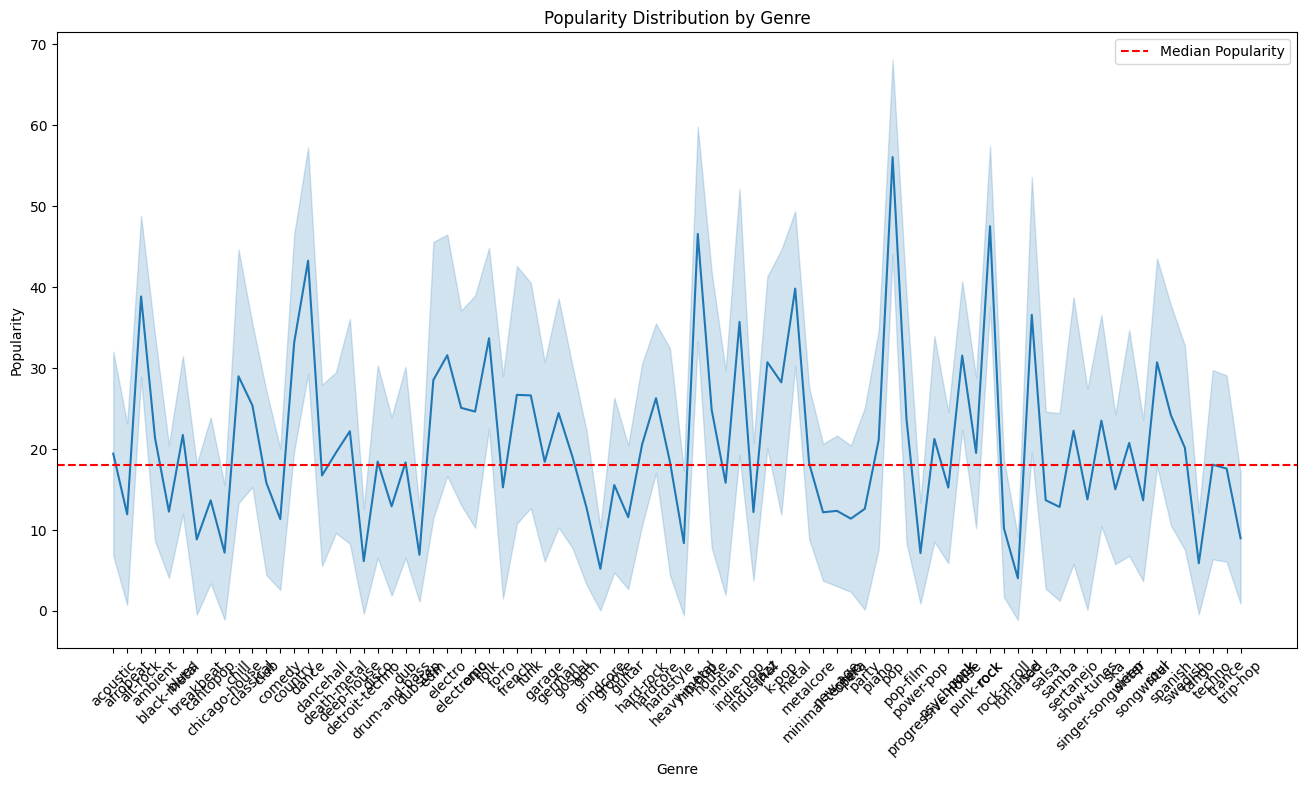

In [141]:
# popularity vs genre using line plot inside a large plot
plt.figure(figsize=(16, 8))
sns.lineplot(x='genre', y='popularity', data=data, errorbar='sd')
# add a red median line
median_popularity = data['popularity'].median()
plt.axhline(median_popularity, color='red', linestyle='--', label='Median Popularity')
plt.legend()
plt.title('Popularity Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

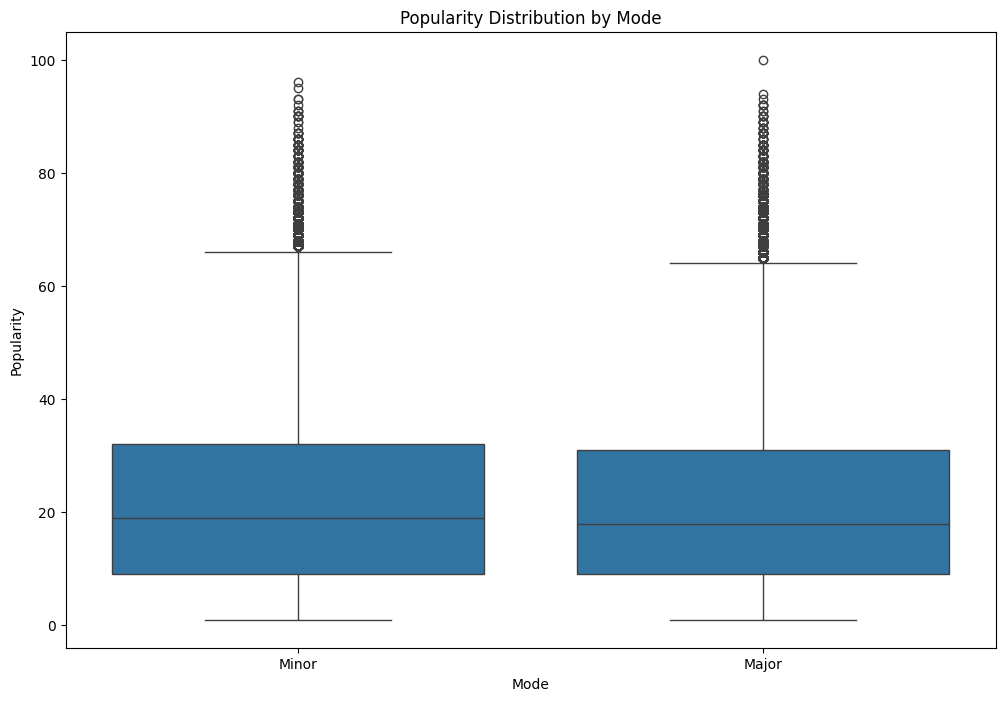

In [142]:
# popularity vs mode using box plot (1: major, 0: minor)
plt.figure(figsize=(12, 8))
sns.boxplot(x='mode', y='popularity', data=data)
plt.title('Popularity Distribution by Mode')
plt.xlabel('Mode')
plt.ylabel('Popularity')
plt.xticks([0, 1], ['Minor', 'Major'])
plt.show()

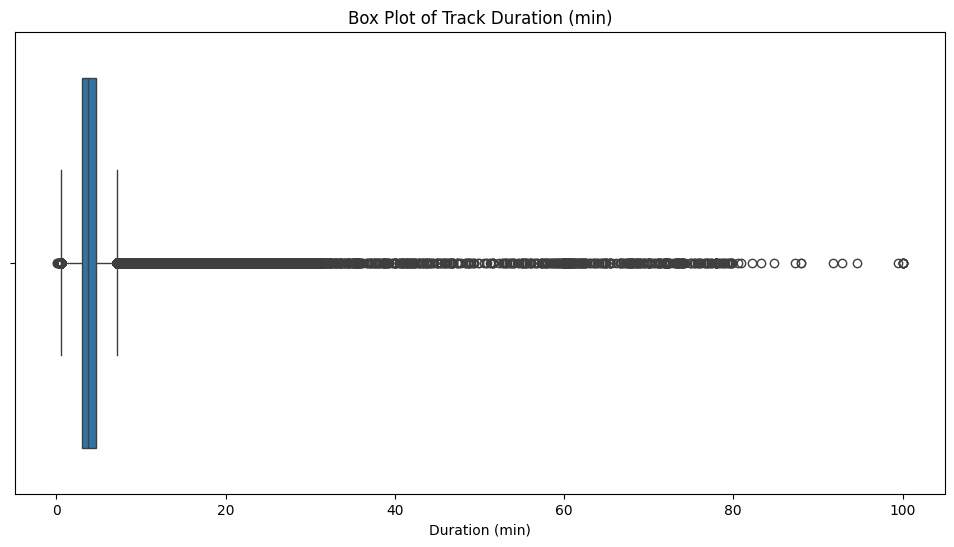

In [143]:
# duration in ms outliers detection using box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['duration_ms']/60000)
plt.title('Box Plot of Track Duration (min)')
plt.xlabel('Duration (min)')
plt.show()

In [144]:
# calculate the quantiles for duration_ms
Q1 = data['duration_ms'].quantile(0.25)
Q3 = data['duration_ms'].quantile(0.75)
Q4 = data['duration_ms'].quantile(0.95)
IQR = Q3 - Q1
print(f"Q1: {Q1}, Q3: {Q3}, Q4: {Q4}")

Q1: 181707.0, Q3: 281307.0, Q4: 436121.1999999997


In [145]:
# add feature normal vs long duration
data['long_duration'] = data['duration_ms'].apply(lambda x: 1 if x > Q4 else 0)

# add feature normal vs short duration
data['short_duration'] = data['duration_ms'].apply(lambda x: 1 if x < Q1 else 0)

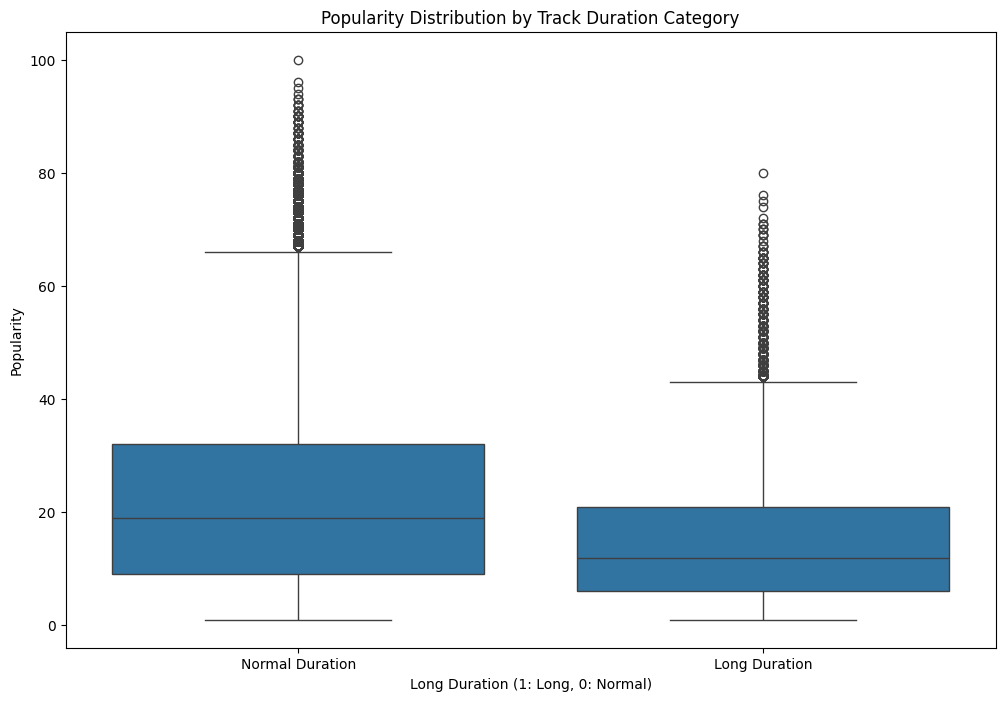

In [146]:
# long_duration vs popularity box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='long_duration', y='popularity', data=data)
plt.title('Popularity Distribution by Track Duration Category')
plt.xlabel('Long Duration (1: Long, 0: Normal)')
plt.ylabel('Popularity')
plt.xticks([0, 1], ['Normal Duration', 'Long Duration'])
plt.show()

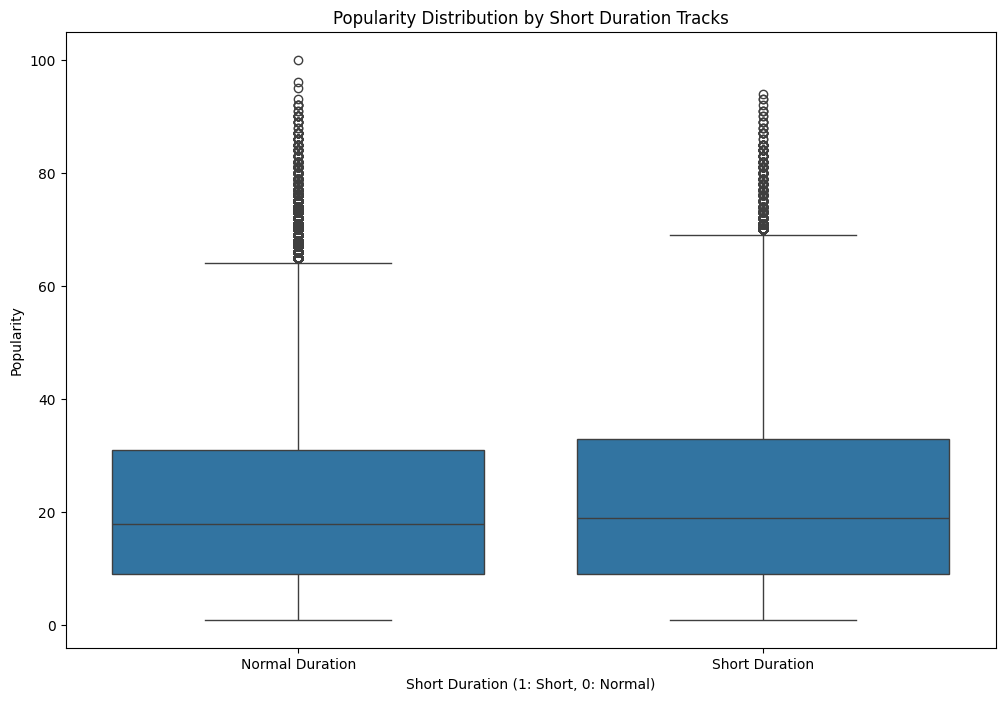

In [147]:
# plot short_duration vs popularity box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='short_duration', y='popularity', data=data)
plt.title('Popularity Distribution by Short Duration Tracks')
plt.xlabel('Short Duration (1: Short, 0: Normal)')
plt.ylabel('Popularity')
plt.xticks([0, 1], ['Normal Duration', 'Short Duration'])
plt.show()

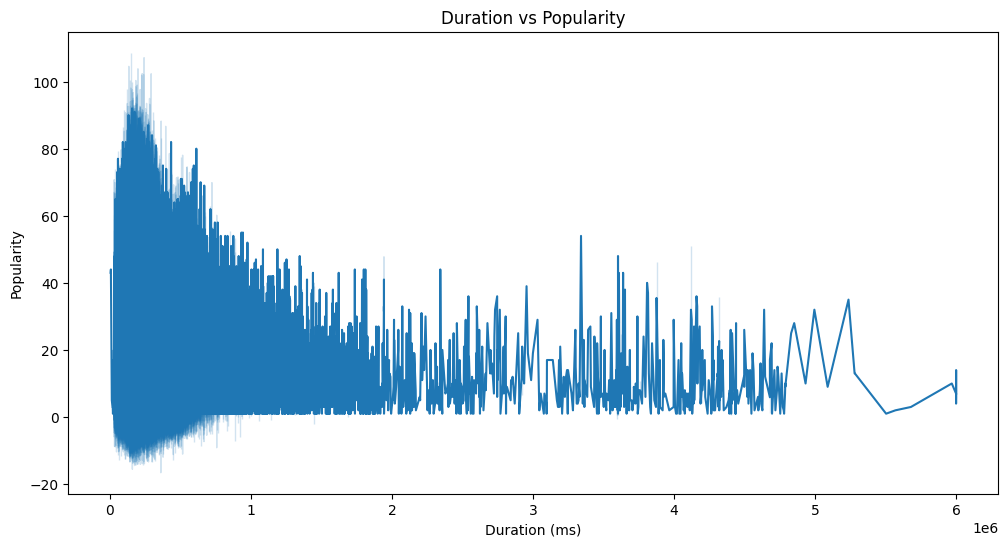

In [148]:
# duration vs popularity line plot using sd error bars
plt.figure(figsize=(12, 6))
sns.lineplot(x='duration_ms', y='popularity', data=data, errorbar='sd')
plt.title('Duration vs Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

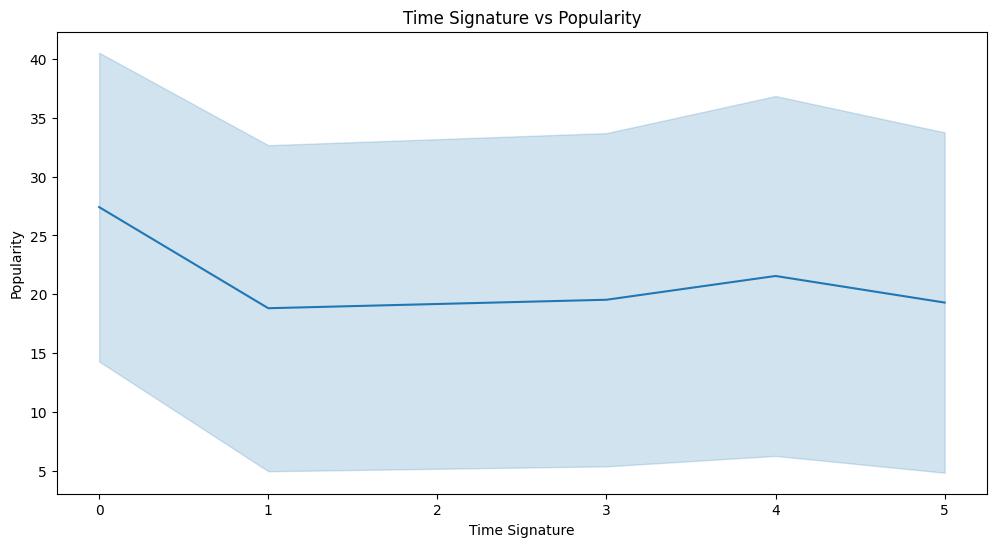

In [149]:
# time signature vs popularity line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='time_signature', y='popularity', data=data, errorbar='sd')
plt.title('Time Signature vs Popularity')
plt.xlabel('Time Signature')
plt.ylabel('Popularity')
plt.show()

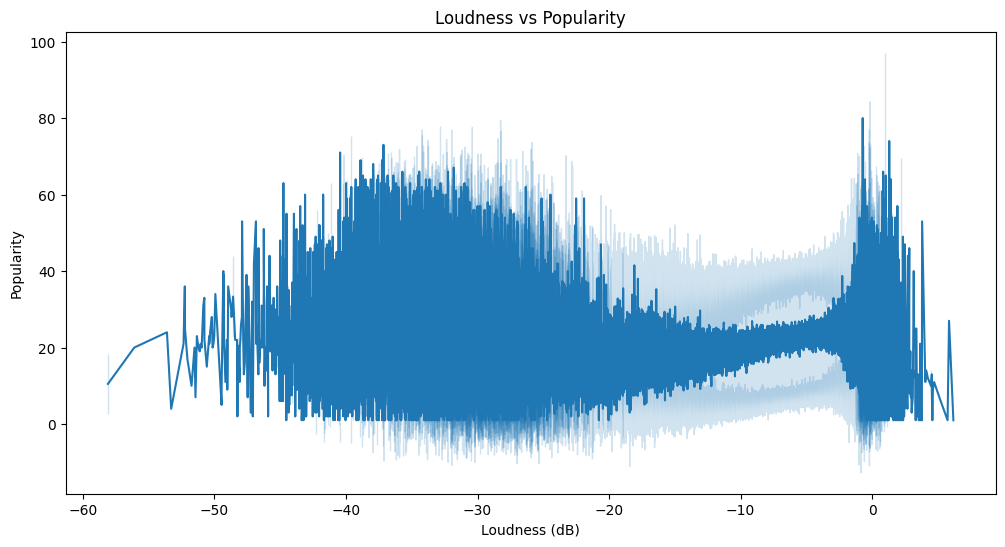

In [150]:
# loudness vs popularity line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='loudness', y='popularity', data=data, errorbar='sd')
plt.title('Loudness vs Popularity')
plt.xlabel('Loudness (dB)')
plt.ylabel('Popularity')
plt.show()  

In [151]:
# percentage of tracks with 0 popularity
num_zero_popularity = data[data['popularity'] == 0].shape[0]
percentage_zero_popularity = (num_zero_popularity / data.shape[0]) * 100
print(f"Percentage of tracks with 0 popularity: {percentage_zero_popularity:.2f}%")

Percentage of tracks with 0 popularity: 0.00%


In [152]:
# nbr of tracks with popularity >=95
num_max_popularity = data[data['popularity'] >= 95].shape[0]
print(f"Number of tracks with popularity >=95: {num_max_popularity}")
percentage_max_popularity = (num_max_popularity / data.shape[0]) * 100
print(f"Percentage of tracks with popularity >=95: {percentage_max_popularity:.2f}%")

Number of tracks with popularity >=95: 3
Percentage of tracks with popularity >=95: 0.00%


# III. Modeling

## III.a. Random model (Base line)

In [153]:
# create a model that randomly predicts the popularity based on the distribution of popularity in the dataset

mean_popularity = data['popularity'].mean()
std_popularity = data['popularity'].std()

data['random_popularity'] = np.random.normal(mean_popularity, std_popularity, size=len(data))
data['random_verdict'] = (data['random_popularity'] > POPULARITY_THRESHOLD).astype(int)

In [154]:
# calculate precision, recall, f1-score
print("Classification Report for Random Model:")
print(classification_report(data['verdict'], data['random_verdict']))

Classification Report for Random Model:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    953675
           1       0.05      0.03      0.04     47698

    accuracy                           0.93   1001373
   macro avg       0.50      0.50      0.50   1001373
weighted avg       0.91      0.93      0.92   1001373



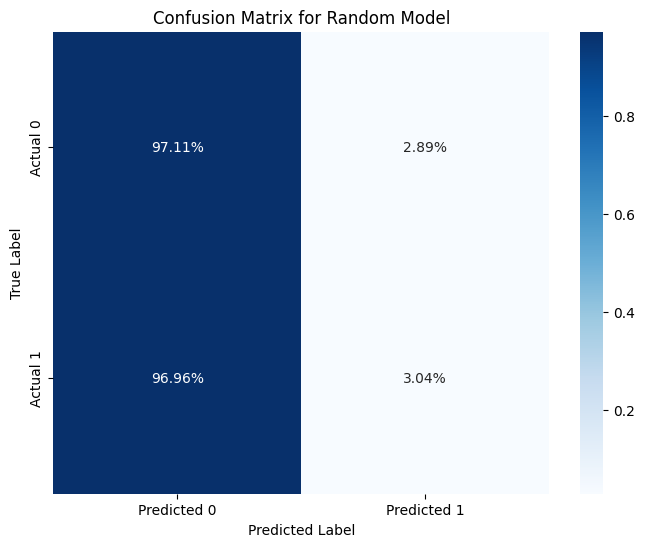

In [155]:
# confusion matrix using percentage
conf_matrix = confusion_matrix(data['verdict'], data['random_verdict'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix / conf_matrix.sum(axis=1)[:, None], annot=True, fmt='.2%', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Random Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

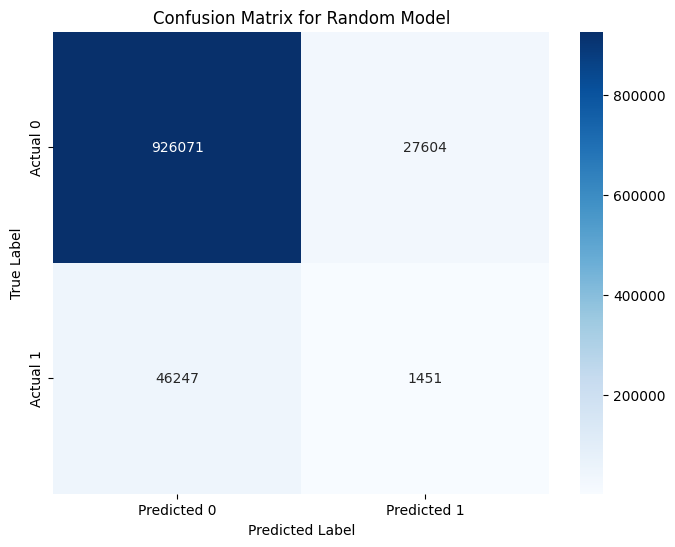

In [156]:
# confusion matrix using absolute numbers
conf_matrix = confusion_matrix(data['verdict'], data['random_verdict'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Random Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# III.b. simple tree

In [157]:
# build a simple decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

features = data.drop(columns=['popularity', 'verdict', 'random_popularity', 'random_verdict'])
features = features.drop(columns=['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'genre', 'year'])
features.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(features, data['verdict'], test_size=0.2, random_state=SEED)
features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,long_duration,short_duration
0,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3,0,0
1,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4,0,0
2,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4,0,1
3,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4,0,0
4,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4,0,0


In [158]:
model = DecisionTreeClassifier(random_state=SEED, class_weight='balanced', max_depth=1)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [159]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Decision Tree Model Accuracy: {accuracy:.2f}")
print("Classification Report for Decision Tree Model:")
print(classification_report(y_test, predictions))

Decision Tree Model Accuracy: 0.43
Classification Report for Decision Tree Model:
              precision    recall  f1-score   support

           0       0.98      0.41      0.58    190749
           1       0.07      0.84      0.12      9526

    accuracy                           0.43    200275
   macro avg       0.52      0.63      0.35    200275
weighted avg       0.94      0.43      0.56    200275



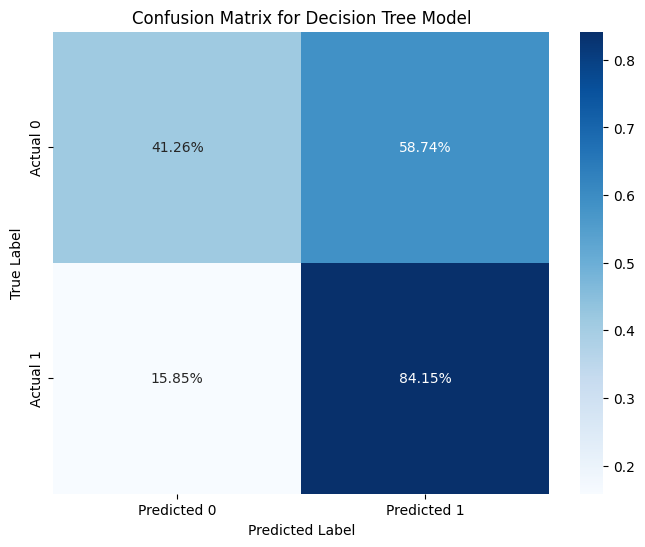

In [160]:
# confusion matrix with percentage
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix / conf_matrix.sum(axis=1)[:, None], annot=True, fmt='.2%', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

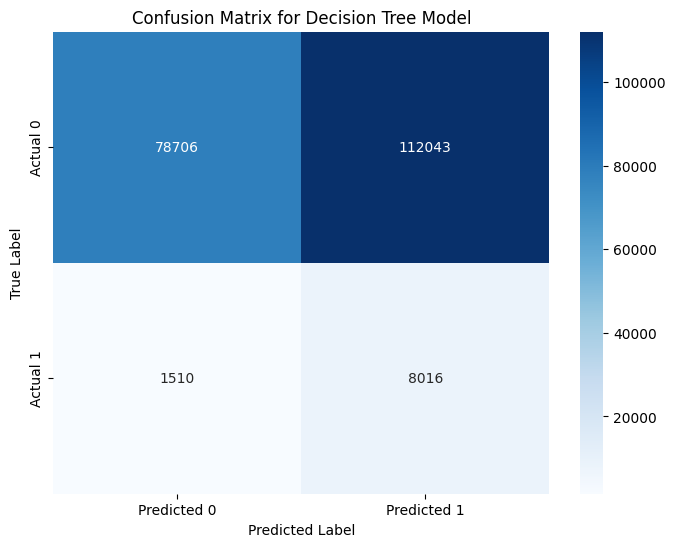

In [161]:
# confusion matrix with absolute numbers
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

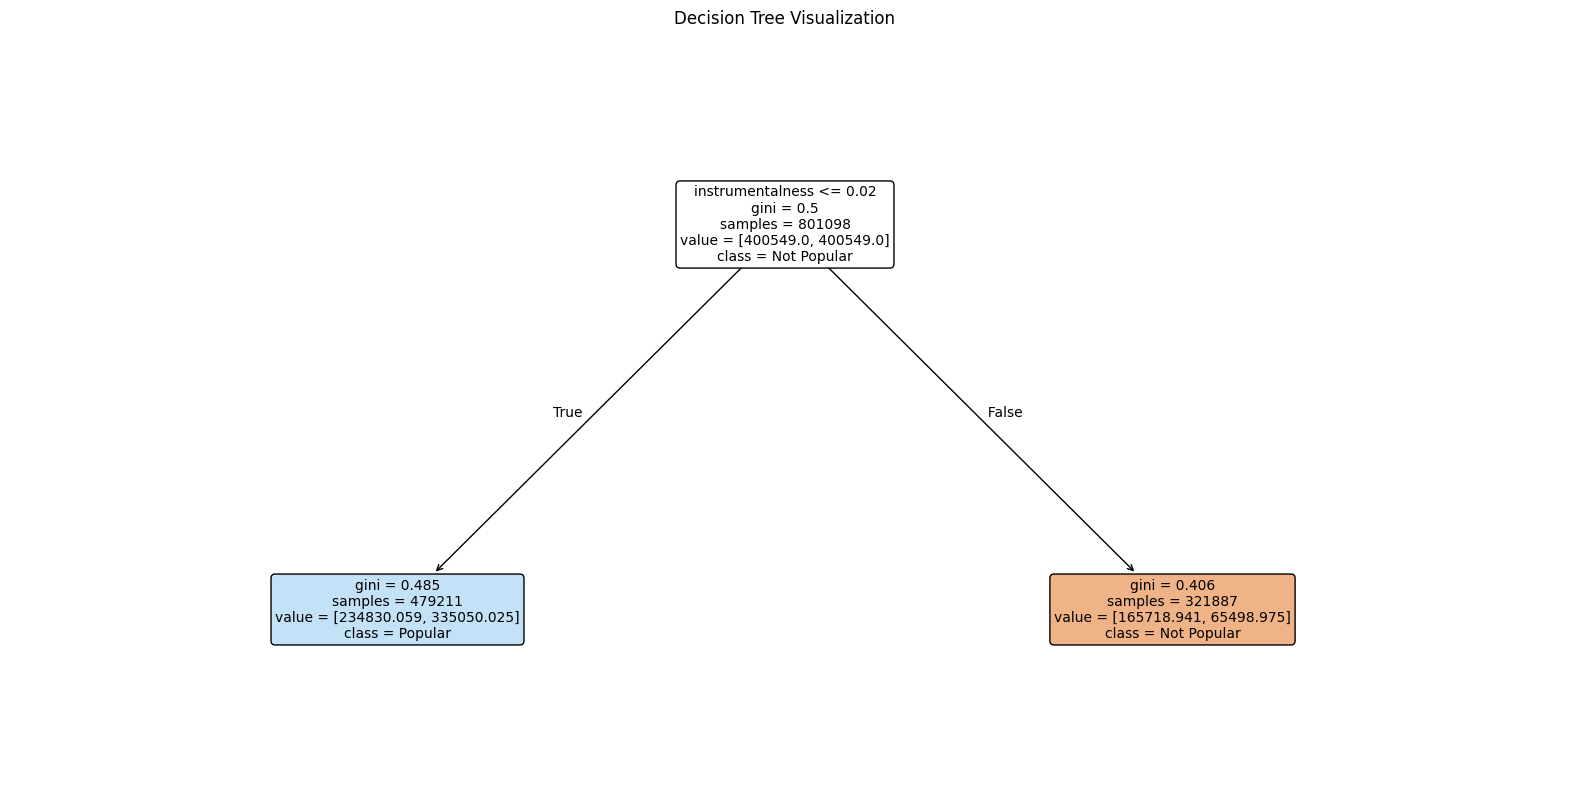

In [162]:
# display the tree, i want to see the set of rules used by the tree

from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=features.columns, class_names=['Not Popular', 'Popular'], rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

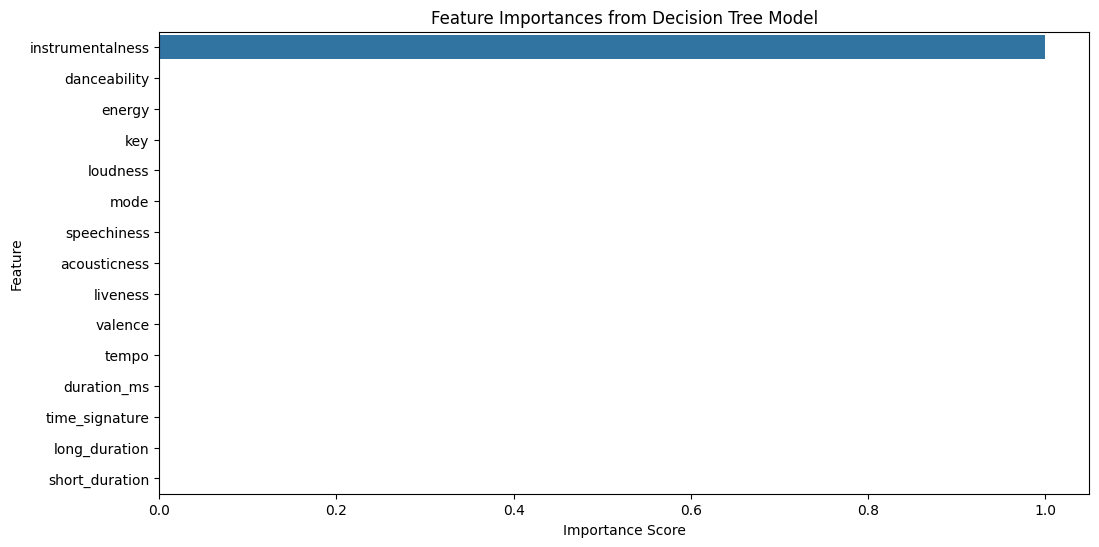

In [163]:
# display feature importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importances from Decision Tree Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [164]:
# get the depth of the tree
tree_depth = model.get_depth()
print(f"Depth of the Decision Tree: {tree_depth}")

Depth of the Decision Tree: 1


## III.c. Random forest

In [165]:
# build a random forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=SEED, class_weight='balanced', n_estimators=100, max_depth=10, max_features='sqrt', min_samples_split=10)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [166]:
# messure rf_model performance
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Model Accuracy: {rf_accuracy:.2f}")
print("Classification Report for Random Forest Model:")
print(classification_report(y_test, rf_predictions))

Random Forest Model Accuracy: 0.66
Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.98      0.66      0.79    190749
           1       0.10      0.76      0.18      9526

    accuracy                           0.66    200275
   macro avg       0.54      0.71      0.48    200275
weighted avg       0.94      0.66      0.76    200275



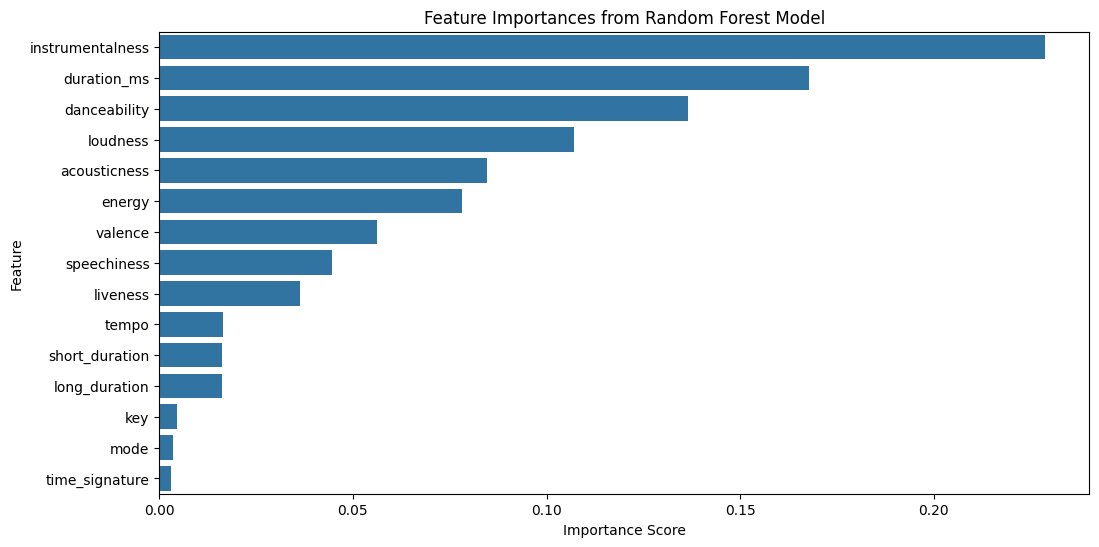

In [167]:
# feature importance for rf_model
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_feature_importances = rf_feature_importances.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=rf_feature_importances.values, y=rf_feature_importances.index)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [168]:
# display the learning curve of the random forest the model
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, val_scores = learning_curve(
#     rf_model, X_train, y_train, cv=5, scoring='f1', n_jobs=-1,
#     train_sizes=np.linspace(0.1, 1.0, 8), random_state=SEED
# )
# plt.figure(figsize=(12, 6))
# plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score', marker='o')
# plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score', marker='o')
# plt.title('Learning Curve for Random Forest Model')
# plt.xlabel('Training Set Size')
# plt.ylabel('F1 Score')
# plt.legend()
